In [ ]:
LINEAR REGRESSION PROBLEM  
X IS INPUT
y is output and continuous values

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df=pd.read_csv("E:\DATA SCIENCE\JANUARY\car data.csv")

In [101]:
df.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
239,eon,2012,2.00,4.43,23709,Petrol,Dealer,Manual,0
21,ignis,2017,4.90,5.71,2400,Petrol,Dealer,Manual,0
235,verna,2017,9.10,9.40,15141,Petrol,Dealer,Manual,0
293,city,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0
218,verna,2014,6.45,9.40,45078,Petrol,Dealer,Manual,0


In [102]:
X=df.drop("Selling_Price",axis=1)
# X is out input all columns except selling price

In [103]:
y= df.Selling_Price

In [104]:
X.info() # here convert object datatype/string into int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [ ]:
sort all those columns which are not required from X (input)
drop car name and present price

In [105]:
X.drop(['Car_Name','Present_Price'],axis=1,inplace=True)

In [106]:
X.head()

,Year,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,27000,Petrol,Dealer,Manual,0
1,2013,43000,Diesel,Dealer,Manual,0
2,2017,6900,Petrol,Dealer,Manual,0
3,2011,5200,Petrol,Dealer,Manual,0
4,2014,42450,Diesel,Dealer,Manual,0


In [107]:
X.isnull().sum()
# check null values

Year            0
Kms_Driven      0
Fuel_Type       0
Seller_Type     0
Transmission    0
Owner           0
dtype: int64

In [108]:
type(X.Year) 

pandas.core.series.Series

In [ ]:
convert type of year into int from series for easy calculations
add new column with resp to Year that is how old car is? 2023 - (Year of X)2017

In [109]:
X['Years']= 2023 - X['Year']

In [110]:
X['Years']

0       9
1      10
2       6
3      12
4       9
       ..
296     7
297     8
298    14
299     6
300     7
Name: Years, Length: 301, dtype: int64

In [111]:
years=[]
for i in X['Year']:
    a=2023-i
    years.append(a)

In [112]:
years

[9,
 10,
 6,
 12,
 9,
 5,
 8,
 8,
 7,
 8,
 6,
 8,
 8,
 8,
 14,
 7,
 8,
 7,
 8,
 13,
 7,
 6,
 12,
 9,
 10,
 12,
 10,
 6,
 13,
 8,
 11,
 12,
 9,
 9,
 9,
 12,
 8,
 20,
 7,
 20,
 7,
 9,
 15,
 9,
 11,
 9,
 10,
 17,
 8,
 6,
 11,
 8,
 6,
 10,
 18,
 14,
 8,
 13,
 9,
 9,
 10,
 8,
 9,
 8,
 6,
 9,
 6,
 13,
 12,
 7,
 9,
 12,
 10,
 12,
 9,
 8,
 10,
 19,
 13,
 11,
 7,
 8,
 6,
 8,
 18,
 17,
 13,
 11,
 10,
 9,
 14,
 9,
 18,
 8,
 15,
 11,
 7,
 6,
 10,
 13,
 7,
 6,
 6,
 6,
 6,
 8,
 9,
 10,
 7,
 6,
 7,
 7,
 9,
 7,
 8,
 8,
 10,
 8,
 8,
 10,
 7,
 12,
 7,
 10,
 11,
 14,
 6,
 7,
 6,
 6,
 6,
 8,
 6,
 7,
 6,
 8,
 9,
 10,
 7,
 8,
 10,
 7,
 8,
 7,
 9,
 11,
 9,
 8,
 13,
 7,
 12,
 7,
 11,
 10,
 9,
 6,
 6,
 8,
 6,
 6,
 12,
 9,
 11,
 13,
 7,
 7,
 7,
 9,
 10,
 8,
 11,
 8,
 9,
 6,
 8,
 12,
 12,
 7,
 9,
 13,
 11,
 7,
 10,
 10,
 15,
 15,
 13,
 10,
 10,
 18,
 15,
 11,
 16,
 10,
 15,
 8,
 15,
 13,
 12,
 16,
 17,
 13,
 8,
 12,
 8,
 7,
 6,
 8,
 6,
 8,
 11,
 8,
 7,
 12,
 6,
 11,
 7,
 7,
 9,
 11,
 6,
 10,
 9,
 8,
 10,
 12,
 8

In [113]:
X.head()

,Year,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years
0,2014,27000,Petrol,Dealer,Manual,0,9
1,2013,43000,Diesel,Dealer,Manual,0,10
2,2017,6900,Petrol,Dealer,Manual,0,6
3,2011,5200,Petrol,Dealer,Manual,0,12
4,2014,42450,Diesel,Dealer,Manual,0,9


In [114]:
X['Year']= 2023 - X['Year']

In [115]:
X.head()

,Year,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years
0,9,27000,Petrol,Dealer,Manual,0,9
1,10,43000,Diesel,Dealer,Manual,0,10
2,6,6900,Petrol,Dealer,Manual,0,6
3,12,5200,Petrol,Dealer,Manual,0,12
4,9,42450,Diesel,Dealer,Manual,0,9


In [116]:
X.drop(['Year'],axis=1,inplace=True)

In [117]:
X.head()

,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years
0,27000,Petrol,Dealer,Manual,0,9
1,43000,Diesel,Dealer,Manual,0,10
2,6900,Petrol,Dealer,Manual,0,6
3,5200,Petrol,Dealer,Manual,0,12
4,42450,Diesel,Dealer,Manual,0,9


In [118]:
X.shape # we have total 301 samples

(301, 6)

In [ ]:
To check unique elements from columns of a dataset X is input

In [119]:
X['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [120]:
X['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [121]:
X['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [122]:
X['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [ ]:
convert type of year into int from series for easy calculations
fuel type,transmission,seller type convert these

use of FEATURE ENGG. use get dummies or encode the column itself

In [123]:
X.head()

,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years
0,27000,Petrol,Dealer,Manual,0,9
1,43000,Diesel,Dealer,Manual,0,10
2,6900,Petrol,Dealer,Manual,0,6
3,5200,Petrol,Dealer,Manual,0,12
4,42450,Diesel,Dealer,Manual,0,9


In [124]:
from sklearn.preprocessing import LabelEncoder

In [125]:
label=LabelEncoder()

In [126]:
X['Seller_Type']=label.fit_transform(X['Seller_Type'])
X['Fuel_Type']=label.fit_transform(X['Fuel_Type'])
X['Transmission']=label.fit_transform(X['Transmission'])

In [127]:
X=pd.concat([X['Seller_Type'],X['Fuel_Type'],X['Transmission'],X['Kms_Driven'],X['Owner'],X['Years']],axis=1)

In [128]:
X.sample(20)

,Seller_Type,Fuel_Type,Transmission,Kms_Driven,Owner,Years
125,1,2,1,40000,0,14
276,0,2,1,24800,0,8
14,0,2,1,77427,0,14
296,0,1,1,33988,0,7
98,0,2,1,45000,0,10
131,1,2,1,18000,0,8
37,1,2,1,127000,0,20
150,1,2,1,6000,0,12
80,0,1,1,23000,0,7
70,0,1,1,71000,0,9


In [129]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Seller_Type   301 non-null    int32
 1   Fuel_Type     301 non-null    int32
 2   Transmission  301 non-null    int32
 3   Kms_Driven    301 non-null    int64
 4   Owner         301 non-null    int64
 5   Years         301 non-null    int64
dtypes: int32(3), int64(3)
memory usage: 10.7 KB


In [130]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from minmaxscaler we will use for normalising value of coulmns like owner,kms,year

In [131]:
scaler=MinMaxScaler()

In [132]:
scaler.fit_transform(X[['Kms_Driven','Owner','Years']])

array([[0.05305305, 0.        , 0.26666667],
       [0.08508509, 0.        , 0.33333333],
       [0.01281281, 0.        , 0.06666667],
       [0.00940941, 0.        , 0.46666667],
       [0.08398398, 0.        , 0.26666667],
       [0.00314515, 0.        , 0.        ],
       [0.03662863, 0.        , 0.2       ],
       [0.06592392, 0.        , 0.2       ],
       [0.03958559, 0.        , 0.13333333],
       [0.08381782, 0.        , 0.2       ],
       [0.00327327, 0.        , 0.06666667],
       [0.1011011 , 0.        , 0.2       ],
       [0.02902903, 0.        , 0.2       ],
       [0.05105105, 0.        , 0.2       ],
       [0.15400801, 0.        , 0.6       ],
       [0.08508509, 0.        , 0.13333333],
       [0.08243844, 0.        , 0.2       ],
       [0.08508509, 0.        , 0.13333333],
       [0.07007007, 0.        , 0.2       ],
       [0.08196597, 0.        , 0.53333333],
       [0.04904905, 0.        , 0.13333333],
       [0.0038038 , 0.        , 0.06666667],
       [0.

In [134]:
X[['Kms_Driven','Owner','Years']]=scaler.fit_transform(X[['Kms_Driven','Owner','Years']])

In [138]:
X.head(10) # input

,Seller_Type,Fuel_Type,Transmission,Kms_Driven,Owner,Years
0,0,2,1,0.053053,0.0,0.266667
1,0,1,1,0.085085,0.0,0.333333
2,0,2,1,0.012813,0.0,0.066667
3,0,2,1,0.009409,0.0,0.466667
4,0,1,1,0.083984,0.0,0.266667
5,0,1,1,0.003145,0.0,0.000000
6,0,2,1,0.036629,0.0,0.200000
7,0,1,1,0.065924,0.0,0.200000
8,0,1,1,0.039586,0.0,0.133333
9,0,1,1,0.083818,0.0,0.200000


In [ ]:
X is normalised and all columns value between 0 and 1 so easy to plot

In [140]:
y.head() # y is output and continous values

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [141]:
from sklearn.linear_model import LinearRegression

In [142]:
model=LinearRegression()

In [145]:
X_train.shape

(201, 6)

In [146]:
X_test.shape

(100, 6)

In [147]:
y_train.shape

(201,)

In [148]:
y_test.shape

(100,)

In [149]:
model.fit(X_train,y_train)

LinearRegression()

In [150]:
model.score(X_test,y_test)

0.6207487342344752

In [151]:
predicted_price=model.predict(X_test)

In [152]:
predicted_price
# so here first car price should be 5.8 and so on

array([ 5.86555557,  5.26798709,  8.23759519, -0.57037144,  4.53549543,
        9.0882827 ,  1.10303921,  0.57165082,  1.32305812,  8.77104386,
        9.70375134,  0.48655868,  9.05928482,  5.97451938,  8.42647716,
        4.79010224, -0.08115615,  5.58888971,  1.61157832,  1.53684965,
        0.26860005,  9.19482821,  7.95032572,  3.63877199,  0.74809352,
        4.13902343,  4.70882443,  3.87748859,  1.63648788,  1.36457405,
        0.31011598,  8.95786554, -0.60941533,  2.99947321,  9.4394193 ,
        4.82815684,  4.86761248,  3.38555585,  4.71067189,  3.60557476,
        2.1422158 ,  6.86069403,  4.66209312,  0.92453622,  8.99551536,
        0.47617969,  4.8813595 ,  8.35565186,  4.43169522,  8.15593336,
        8.93473179,  1.5648729 , 13.57507616, 13.93208213,  9.28562867,
        9.91191834,  4.85608155,  9.34588391,  2.23204076,  9.74903059,
        0.45542173, -1.69748239,  1.55864551, -1.05983214,  5.18310253,
        1.26804952, 13.16823556, 13.50242328,  5.00454251,  0.23

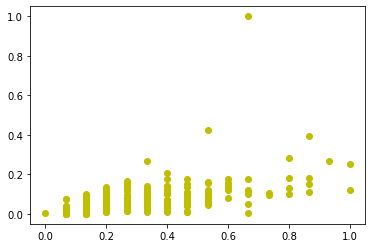

In [202]:
plt.scatter(X['Years'],X['Kms_Driven'],c='y')
plt.show()

#  why there is no plot for this data set?
#as normalisaton used to set sample bet 0 and 1 . how to use these to plot grapf 
# or these much is enough 


In [176]:
import seaborn as sns

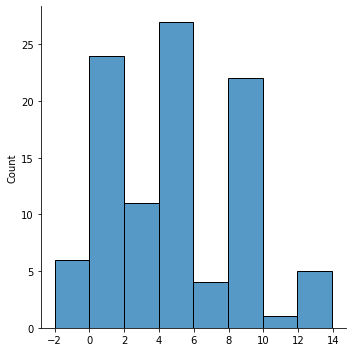

In [192]:
sns.displot(predicted_price)